In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
Data_1 = pd.read_csv(r"C:\Users\Padma Jothi\Desktop\Financial-Analytics-data1.csv")

In [3]:
Data_1.head()

,Name,Mar Cap - Crore,Sales Qtr - Crore,Market_Cap_Category,Sales_Qrt_Category
0,Reliance Inds.,583436.72,99810.00,Large Cap,High Sales
1,TCS,563709.84,30904.00,Large Cap,High Sales
2,HDFC Bank,482953.59,20581.27,Large Cap,High Sales
3,ITC,320985.27,9772.02,Large Cap,High Sales
4,H D F C,289497.37,16840.51,Large Cap,High Sales


In [4]:
Data_1.tail()

,Name,Mar Cap - Crore,Sales Qtr - Crore,Market_Cap_Category,Sales_Qrt_Category
454,Prime Focus,3031.50,609.61,Very Small Cap,Low Sales
455,Lak. Vilas Bank,3029.57,790.17,Very Small Cap,Low Sales
456,NOCIL,3026.26,249.27,Very Small Cap,Very Low Sales
457,Orient Cement,3024.32,511.53,Very Small Cap,Very Low Sales
458,Natl.Fertilizer,3017.07,2840.75,Very Small Cap,High Sales


In [5]:
Data_1.shape

(459, 5)

In [6]:
Data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 459 non-null    object 
 1   Mar Cap - Crore      459 non-null    float64
 2   Sales Qtr - Crore    459 non-null    float64
 3   Market_Cap_Category  459 non-null    object 
 4   Sales_Qrt_Category   459 non-null    object 
dtypes: float64(2), object(3)
memory usage: 18.1+ KB


In [7]:
Data_1.describe()

,Mar Cap - Crore,Sales Qtr - Crore
count,459.000000,459.000000
mean,28870.974139,3807.789412
std,60557.081792,9989.449987
min,3017.070000,0.000000
25%,4942.815000,534.910000
50%,10442.090000,1137.170000
75%,24707.320000,2730.195000
max,583436.720000,110666.930000


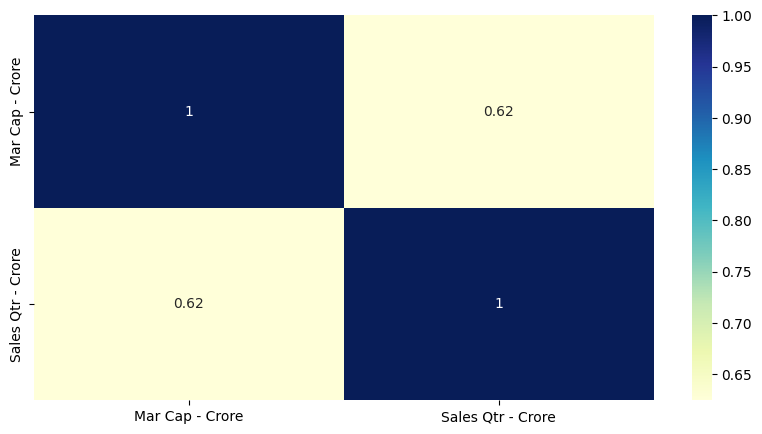

In [8]:
#Selecting numerical columns
numeric_dtypes = Data_1.select_dtypes(exclude='object')

#Analaysing correlation between numerical columns
corr_data = numeric_dtypes.corr()

#Visualizing the correlation
plt.figure(figsize=(10,5))
sns.heatmap(data=corr_data,annot=True,cmap='YlGnBu')
plt.show()

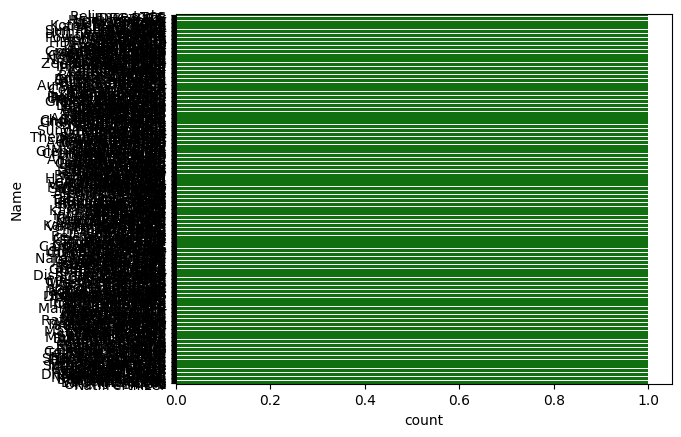

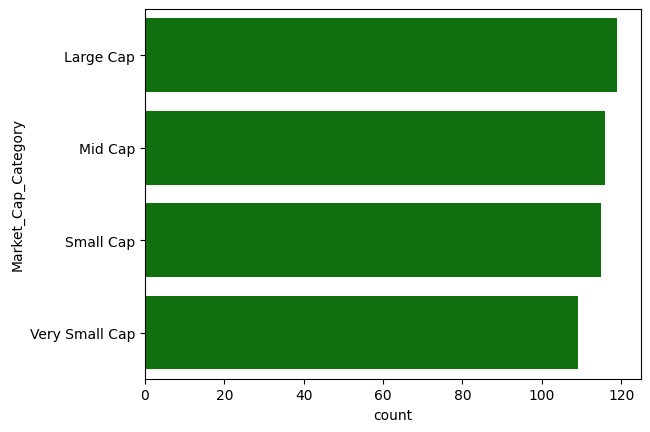

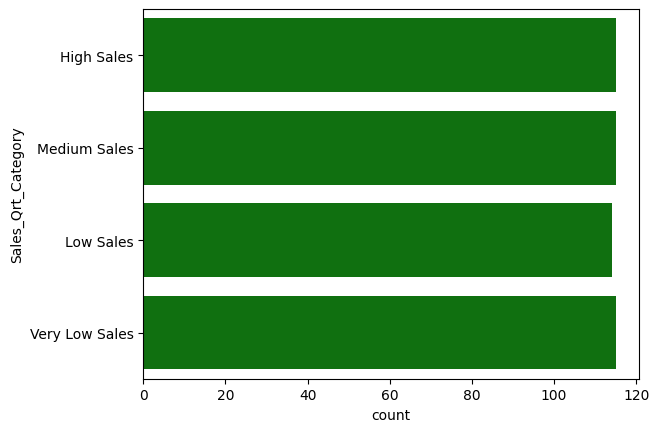

In [9]:
for col in Data_1:
    if Data_1[col].dtype == 'O':
        sns.countplot(data=Data_1,y=col,color='green')
        plt.show()

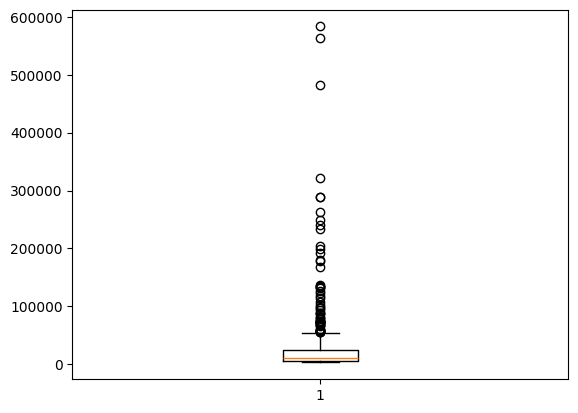

In [10]:
plt.boxplot(x=Data_1['Mar Cap - Crore'])
plt.show()

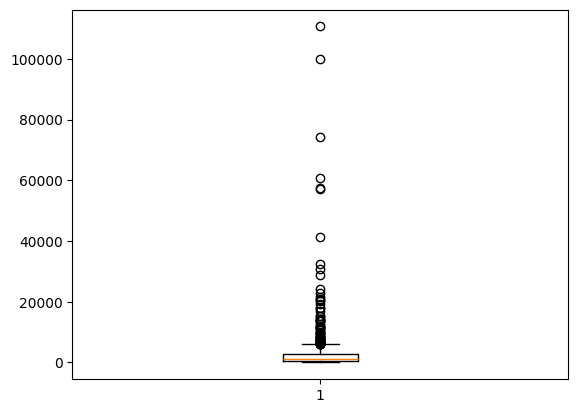

In [11]:
plt.boxplot(x=Data_1['Sales Qtr - Crore'])
plt.show()

C:\Users\Padma Jothi\AppData\Local\Temp\ipykernel_21004\964189890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Data_1['Mar Cap - Crore'])


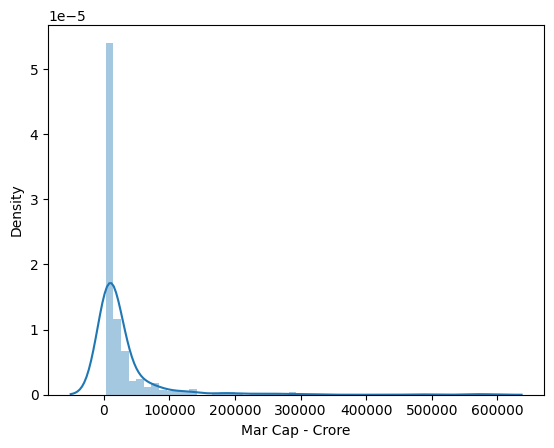

In [12]:
sns.distplot(a=Data_1['Mar Cap - Crore'])
plt.show()

C:\Users\Padma Jothi\AppData\Local\Temp\ipykernel_21004\1269279263.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=Data_1['Sales Qtr - Crore'])


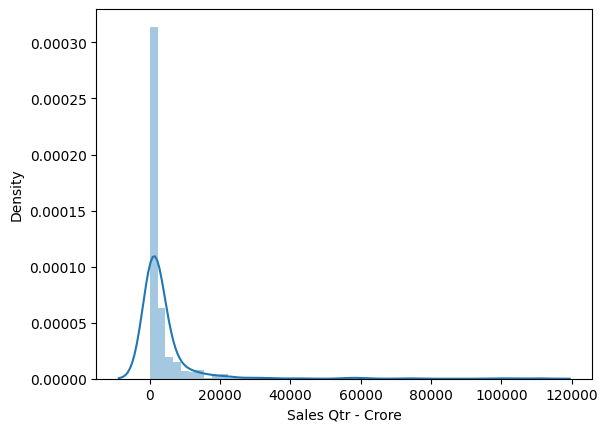

In [13]:
sns.distplot(a=Data_1['Sales Qtr - Crore'])
plt.show()

In [15]:
iqr_multipliers = {'Mar Cap - Crore':2.5,
                   'Sales Qtr - Crore':1.5
                   }

for col,multipliers in iqr_multipliers.items():
    Q1 = Data_1[col].quantile(0.25)
    Q3 = Data_1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1-multipliers*IQR
    upper_bound = Q3+multipliers*IQR
    print(f"{col}: lower_bound={lower_bound}, upper_bound={upper_bound}")

    Data_1[col] = Data_1[col].clip(lower=lower_bound, upper=upper_bound)

Mar Cap - Crore: lower_bound=-44468.447499999995, upper_bound=74118.58249999999
Sales Qtr - Crore: lower_bound=-2758.0175, upper_bound=6023.1224999999995


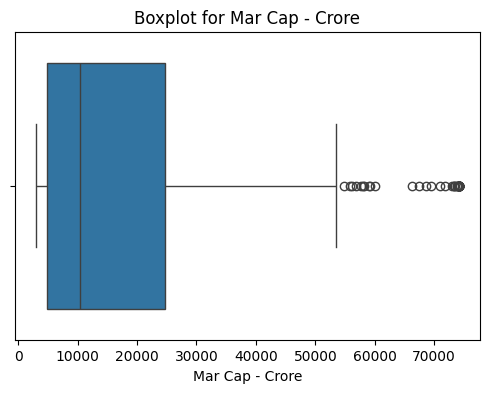

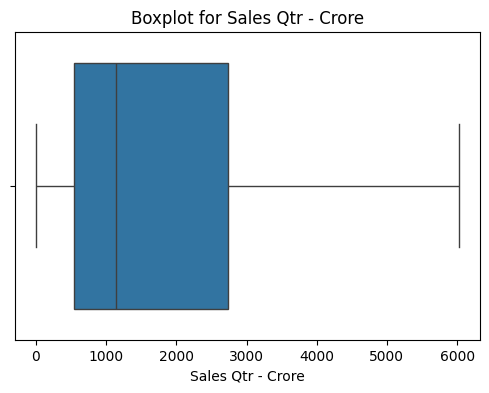

In [16]:
for col in numeric_dtypes:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=Data_1[col])
    plt.title(f'Boxplot for {col}')
    plt.show()